# Modified Randomized Hough transform 
### The randomized hough transform is an algorithm used to detect lines and shapes in 2d images 
In this Notebook I will be implenting the algorithm to detect eliptical patterns from a set of points in a three dimensional cartesian coordinate system.

In [1]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt


# Artificial Elipse Test Data Generator
### We create a set of data points in eliptical pattern to test randomized hough transform algorithm, a small deviance is generated to later asses how accurate algorithm performs when noise is present 

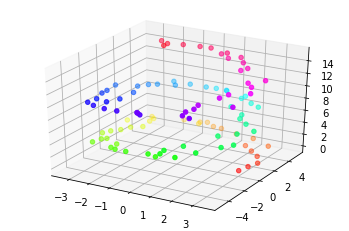

In [6]:
fig = plt.figure()
ax = plt.axes(projection="3d")

z_points = np.linspace(0,15,100)
x_points = 3 * np.cos(z_points) + 0.5 * np.random.randn(100)
y_points = 5 * np.sin(z_points) + 0.1 * np.random.randn(100)
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv')
data = np.column_stack((x_points,y_points,z_points))
plt.show()
plt.close('all')


# The algorithm

In [11]:
#, min_altitutde, max_altitude, grid_unit_size, latitude_distance, longitude_distance
class detectEllipse():
    def __init__(self) -> None:
        self.__minDist = 5
        self.__max_height = 10
    
    def __getCandidateVals(self, x1, y1,x2,y2):
        self.midpoint = np.array([(x1 + x2)/2, (y1+y2)/2])
        self.pointA = ([x1,y1])
        self.pointB = ([x2,y2])
        self.majAxVal = np.sqrt(np.square(x2-x1)+np.square(y2-y1))/2
        self.majAxPoints = np.array([x1,y1],[x2,y2])
        self.majAxVal2 = np.square(majAxVal)
        self.alphaVal = np.arctan((y2-y1)/(x2-x1))
        return {'midpoint': self.midpoint, 'majAxis': self.majAxVal, 'alphaVal' :self.alphaVal}
        
    def __calcVoteVals(self, x1,y1):
        point = np.array([x1,y1])
        distSq =  np.square(self.midpoint[0]-x1)+np.square(self.midpoint[1]-y1)
        dist = np.sqrt(distSq)
        distToOrigin = min(np.linalg.norm(self.pointA-point), np.linalg.norm(self.pointB-point))
        cos2T =np.square( (self.majAxVal2 + distSq - distToOrigin)/(2*self.majAxVal*dist))
        bValCandidate = np.sqrt((self.majAxVal2 * distSq*(1-cos2T) )/(self.majAxVal2-distSq*cos2T))
        return bValCandidate    

    def _ellipseDetector(self,data_points):
        accumulator = np.zeros((8,15))
        print(self.__minDist)


In [9]:
point1 = np.array([4,4])
point2 = np.array([8,8])
dist = np.linalg.norm(point1-point2)
print(dist)
res = 4* np.sqrt(2)
print(res)

5.656854249492381
5.656854249492381


In [12]:
myEllipse = detectEllipse()
myEllipse._ellipseDetector(data)



5


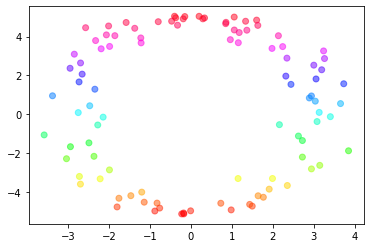

In [5]:

plt.scatter(x_points, y_points,cmap='hsv', c=y_points,alpha=0.5)
plt.show()